back ground  
_ng1.root の新ファイル、tdc_calib branch でやってみる
 
ビーム由来と、それ以外のデータを見たい
tdcを見てきてそうなところを指定してqdc_eeデータを表示する

In [1]:
int RUN = 326; //runnumber
int ch = 1;    //液シン番号
double offset = 6.5; //[MeVee]
double cut    = 22.0; //[MeVee]

まずtdcrawを見る

In [2]:
TFile *f = TFile::Open(Form("./../root/%04d_ng1.root",RUN));
TTree *tree = (TTree *)f->Get("tree");

In [3]:
TCanvas *c1 = new TCanvas("c1","c1",800,600);

In [4]:
int tdcbin = 500;
int tdcmin = 1500;
int tdcmax = 3000;

In [5]:
TH1D *tdcraw = new TH1D("tdcraw","tdcraw",tdcbin,tdcmin,tdcmax); //468
tree->Draw("tdc[7]>>tdcraw"
           ,Form("tdc[%d]!=0",ch));
tdcraw->SetLineColor(3);
tdcraw->Draw();
//c1->Draw();

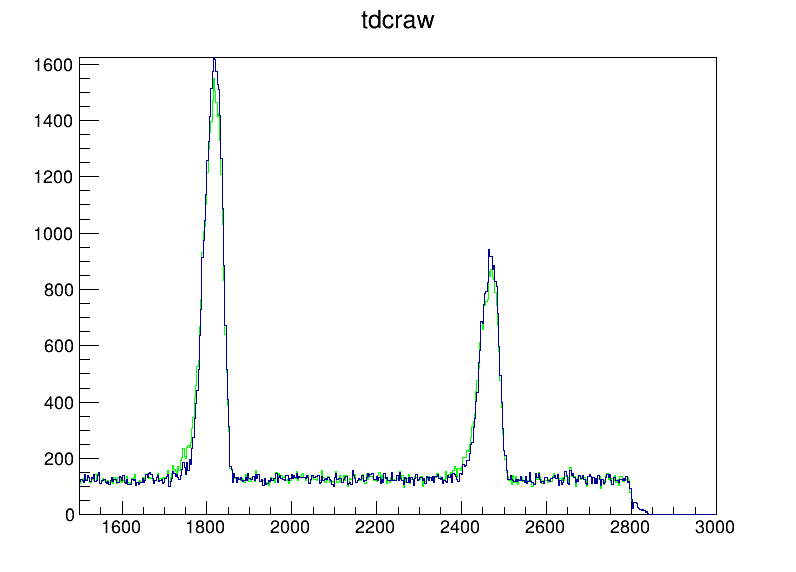

In [6]:

TH1D *tdcnewh = new TH1D("tdcnewh","tdcnewh",tdcbin,tdcmin,tdcmax);
tree->Draw("tdc_calib[7]>>tdcnewh"
          ,Form("tdc[%d]!=0",ch));
tdcraw->SetStats(0);
tdcraw->Draw();
tdcnewh->Draw("same");
//tdcrawh->SetTitle(Form("cfd calibration %04d_%d",RUN,ch));
//tdcnew->SetLineColor(8);
c1->Draw();
//c1->SaveAs(Form("./../figure/tdc_oldnew_0%d_%d.pdf",RUN,ch)); ////

In [7]:
//パラメータの記録
/*
325_3:
cf->SetParameter(7,92);
325_5:
cf->SetParameter(7,92);
cf->SetParameter(10,122);
326_5:
cf->SetParameter(10,122);
*/

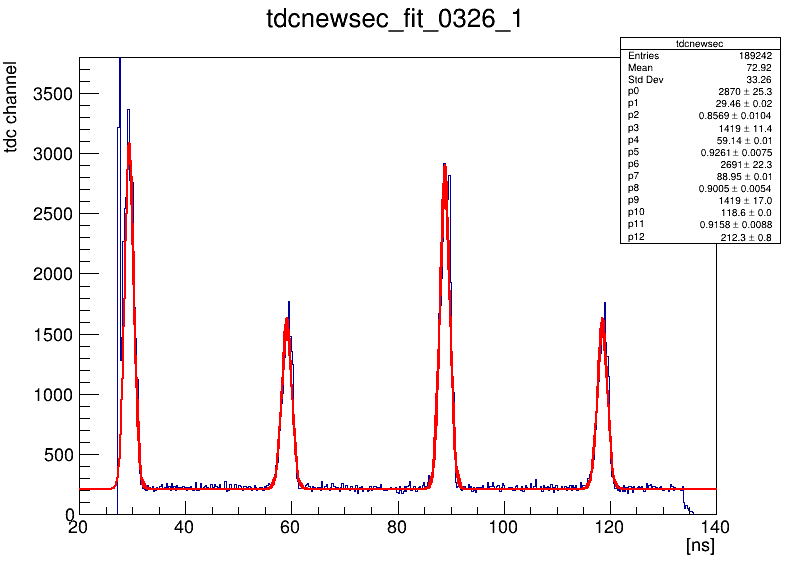

 FCN=4494.45 FROM MIGRAD    STATUS=CONVERGED     593 CALLS         594 TOTAL
                     EDM=2.25817e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.2 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.86980e+03   2.53310e+01   2.21737e-02  -2.46873e-06
   2  p1           2.94569e+01   1.63085e-02  -1.23791e-05   1.38540e-02
   3  p2           8.56925e-01   1.03546e-02  -3.87926e-08  -6.57431e-01
   4  p3           1.41894e+03   1.14321e+01   6.90032e-04   7.45175e-05
   5  p4           5.91420e+01   1.03963e-02   3.91560e-06   1.79880e-02
   6  p5           9.26130e-01   7.49804e-03  -4.94249e-08  -6.38716e-01
   7  p6           2.69125e+03   2.23476e+01   2.12674e-02  -2.97032e-06
   8  p7           8.89482e+01   7.04958e-03  -3.63442e-06  -1.77960e-02
   9  p8           9.00498e-01   5.42926e-03  -2.21456e-08   1.00452e+00
  10  p9           1.41855e+0

In [8]:
TH1D *tdcnewsec = new TH1D("tdcnewsec","tdcnewsec",500,20,140);
tree->Draw("tdcsec[7]>>tdcnewsec"
          ,Form("tdc[%d]!=0",ch));

TF1 *cf = new TF1("cf","gaus(0)+gaus(3)+gaus(6)+gaus(9)+[12]",0,3000);

cf->SetParameter(0,1000);
cf->SetParameter(3,1000);
cf->SetParameter(6,1000);
cf->SetParameter(9,1000);

cf->SetParameter(1,30);
cf->SetParameter(4,60);
cf->SetParameter(7,90);
cf->SetParameter(10,120);

cf->SetParameter(2,1);
cf->SetParameter(5,1);
cf->SetParameter(8,1);
cf->SetParameter(11,1);
cf->SetParLimits(2,0,600);
cf->SetParLimits(5,0,1300);
cf->SetParLimits(8,0,2000);
cf->SetParLimits(11,0,2600);

cf->SetParameter(12,200);

gStyle->SetOptFit(0101);
tdcnewsec->SetTitle(Form("tdcnewsec_fit_0%d_%d;[ns];tdc channel",RUN,ch));
tdcnewsec->Fit(cf,"","",29,135);
tdcnewsec->GetYaxis()->SetRangeUser(0,3800);
tdcnewsec->Draw();
cf->SetNpx(1000);
cf->SetLineWidth(2);
cf->Draw("same");
c1->Draw();

//c1->SaveAs(Form("./../figure/tdcnewsec_fit_0%d_%d.pdf",RUN,ch));  /////

In [9]:
//parameter取得
double m[4]={};
double sd[4]={};
double st[4]={};
for(int i=0; i<4; i++){
    m[i] = cf->GetParameter(1+i*3);
    sd[i] = 2*cf->GetParameter(2+i*3);
    st[i] = 3*cf->GetParameter(2+i*3);
}

qdc の 3Dプロット

In [10]:
TCanvas *c2 = new TCanvas("c2","c2",800,600);

In [11]:
int allmax = 22;
int fastmax = 12;
double allmin = 0.5;
double fastmin = 0.2;

In [12]:
/*
TH2D *qdc = new TH2D("qdc",Form("qdc_0%d_%d",RUN,ch),500,0,2500,500,0,1200);
tree->Draw(Form("fast[%d]:all[%d]>>qdc",ch,ch));
qdc->SetStats(0);
qdc->Draw("colz");
c2->Draw();
*/

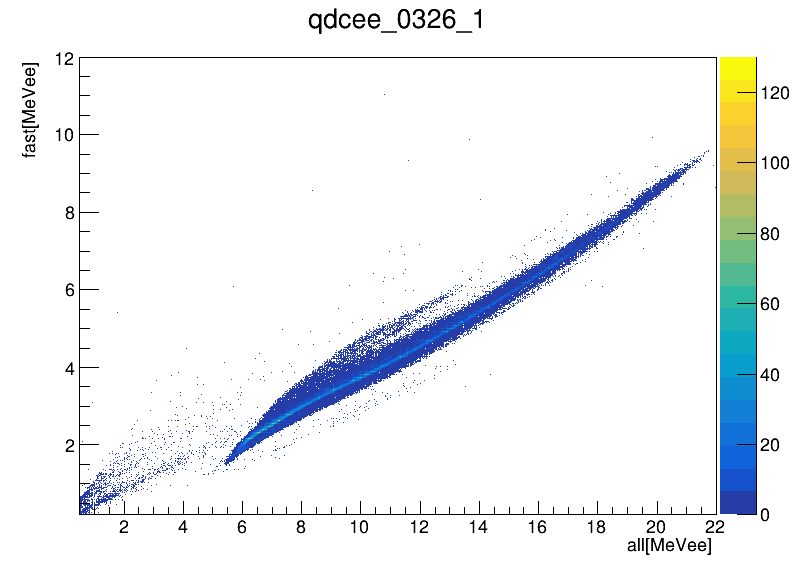

In [13]:
TH2D *qdcee = new TH2D("qdcee",Form("qdcee_0%d_%d;all[MeVee];fast[MeVee]",RUN,ch),1000,allmin,allmax,1000,fastmin,fastmax);
tree->Draw(Form("fast_ee[%d]:all_ee[%d]>>qdcee",ch,ch));
qdcee->SetStats(0);
qdcee->Draw("colz");
c2->Draw();
//c2->SaveAs(Form("./../figure/qdcee_total_0%d_%d.pdf",RUN,ch)); ////

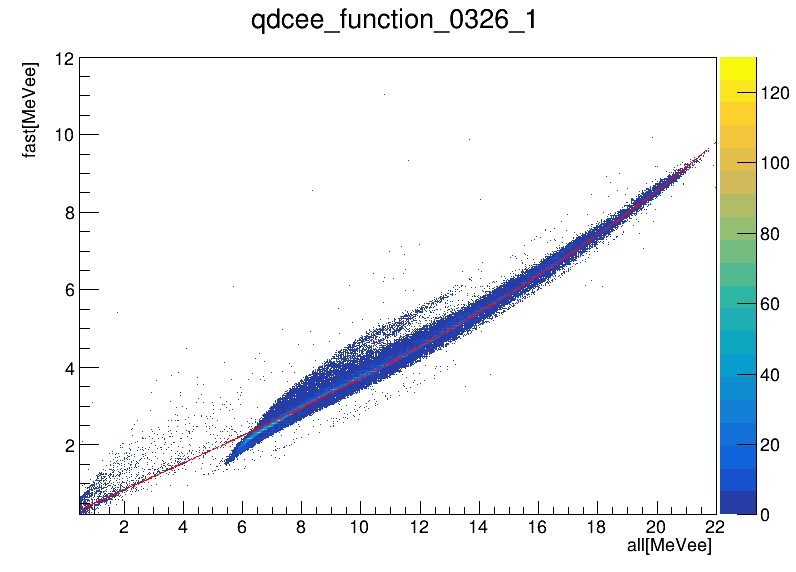

In [14]:
//function
TH2D *func = new TH2D("func","func",1000,0,allmax,1000,0,fastmax);
tree->Draw(Form("function[%d]:all_ee[%d]>>func",ch,ch));
func->SetMarkerColor(kRed);
qdcee->Draw("colz");
func->Draw("same");
qdcee->SetTitle(Form("qdcee_function_%04d_%d",RUN,ch));
c2->Draw();
//c2->SaveAs(Form("./../figure/qdcee_func_0%d_%d.pdf",RUN,ch)); ////

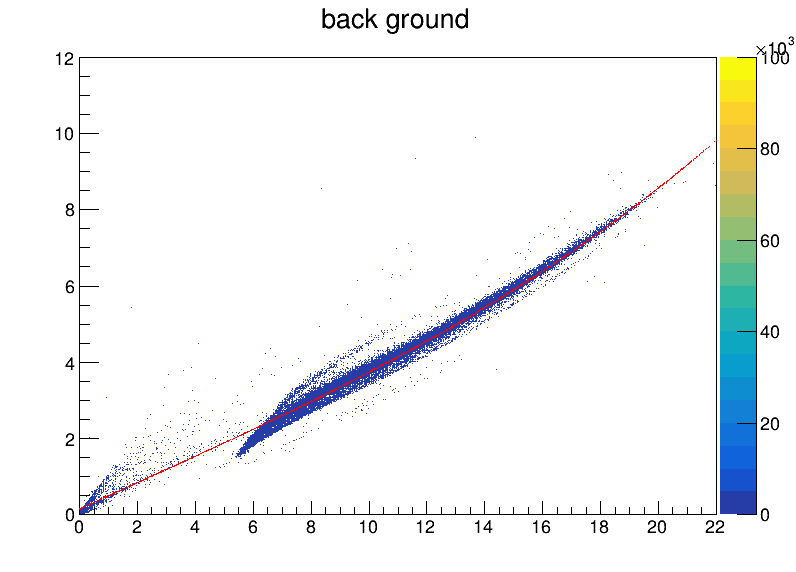

In [15]:
//background

TH2D *qdc2 = new TH2D("qdc2","qdc2",1000,0,allmax,1000,0,fastmax);
tree->Draw(Form("fast_ee[%d]:all_ee[%d]>>qdc2",ch,ch)
           ,Form("!( (tdcsec[7]<(%f+%f)) || ((%f-%f)<tdcsec[7] && tdcsec[7]<(%f+%f)) || ((%f-%f)<tdcsec[7] && tdcsec[7]<(%f+%f)) || ((%f-%f)<tdcsec[7]) )"
                                ,m[0],st[0]  ,m[1],st[1]                           ,m[1],st[1]  ,m[2],st[2]                         ,m[2],st[2]  ,m[3],st[3]            ));
qdc2->SetStats(0);
qdc2->SetTitle("back ground");
qdc2->Draw("colz");
func->Draw("same");
c2->Draw();
//c2->SaveAs(Form("./../figure/qdcee_BG_0%d_%d.pdf",RUN,ch)); ////

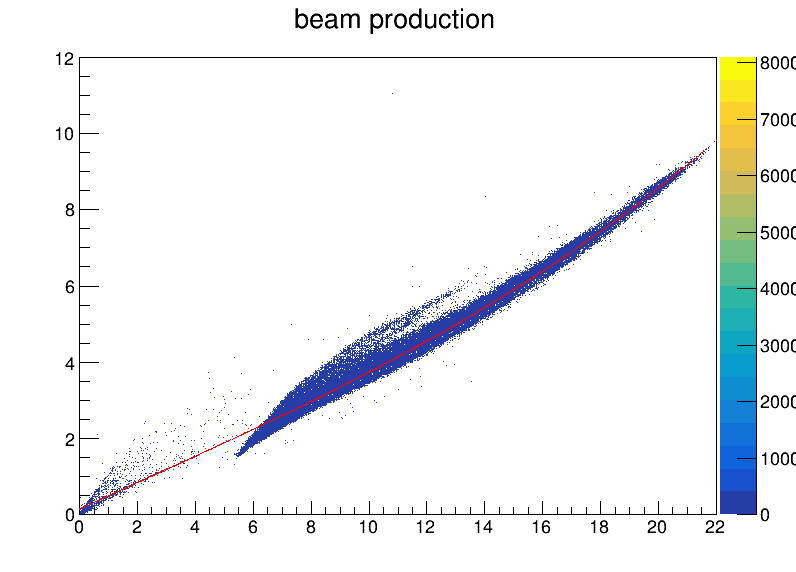

In [16]:
//beam production

TH2D *qdc3 = new TH2D("qdc3","qdc3",1000,0,allmax,1000,0,fastmax);
tree->Draw(Form("fast_ee[%d]:all_ee[%d]>>qdc3",ch,ch)
           ,Form("((%f-%f)<tdcsec[7] && tdcsec[7]<(%f+%f)) || ((%f-%f)<tdcsec[7] && tdcsec[7]<(%f+%f)) || ((%f-%f)<tdcsec[7] && tdcsec[7]<(%f+%f)) || ((%f-%f)<tdcsec[7] && tdcsec[7]<(%f+%f))"
                   ,m[0],st[0]                        ,m[0],st[0]  ,m[1],st[1]                           ,m[1],st[1]  ,m[2],st[2]                         ,m[2],st[2]  ,m[3],st[3]  ,m[3],st[3]));
qdc3->SetStats(0);
qdc3->SetTitle("beam production");
qdc3->Draw("colz");
func->Draw("same");
c2->Draw();
//c2->SaveAs(Form("./../figure/qdcee_beam_0%d_%d.pdf",RUN,ch)); ////

tdc : ngpsd の3Dプロット

In [17]:
//まっすぐになってるかの確認用
/*
TH2F *tdcall = new TH2F("tdcall",Form("tdcnew : all _0%d_%d;all;tdc",RUN,ch),500,400,1000,500,200,3000);
tree->Draw(Form("tdc_calib[7]:all[%d]>>tdcall",ch));
          //,Form("all_ee[%d]>%f",ch,5.0));
tdcall->Draw("colz");
c2->Draw();
//c2->SaveAs(Form("./../figure/tdcnew_qdcall_0%d_%d.pdf",RUN,ch));
*/

In [18]:
//確認用２　範囲指定用
TH2F *tdcall = new TH2F("tdcall",Form("tdcnew : all _0%d_%d;all;tdc",RUN,ch),100,450,700,100,1700,2000);
tree->Draw(Form("tdc_calib[7]:all[%d]>>tdcall",ch));
          //,Form("all_ee[%d]>%f",ch,5.0));
tdcall->Draw("colz");
//c2->Draw();


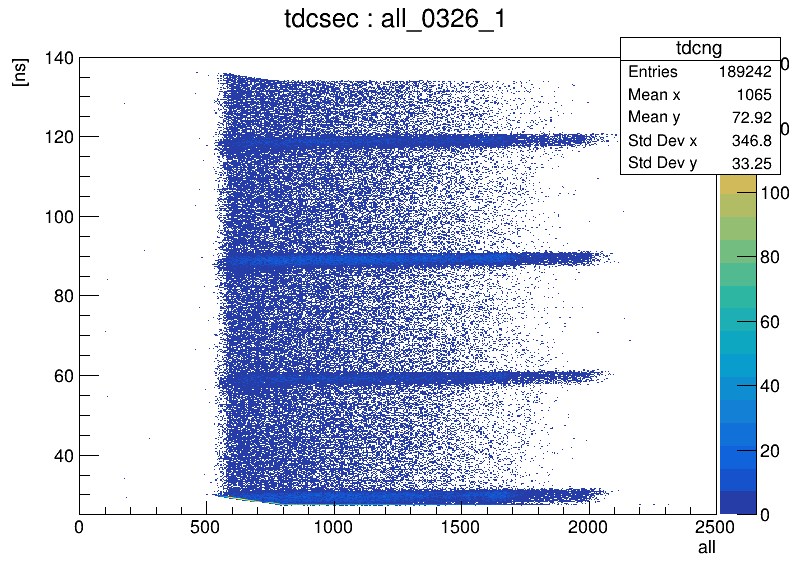

In [19]:
TCanvas *c4 = new TCanvas("c4","c4",800,600);
TH2D *tdcng = new TH2D("tdcng",Form("tdcsec : all_0%d_%d;all;[ns]",RUN,ch),500,0,2500,500,25,140);
tree->Draw(Form("tdcsec[7]:all[%d]>>tdcng",ch)
            ,Form("tdc[%d]!=0",ch));
          //,Form("all_ee[%d]>%f",ch,offset));
tdcng->Draw("colz");
c4->Draw();
//c4->SaveAs(Form("./../figure/tdcnewsec_all_0%d_%d.pdf",RUN,ch)); ////

ngPSDのhist

In [20]:
double a = -0.5;
double b = 0.5;

In [21]:
//total (blue)
TCanvas *c3 = new TCanvas("c3","c3",800,600);
TH1D *hi = new TH1D("hi","hi",500,a,b);
tree->Draw(Form("ngpsd[%d]>>hi",ch)
          ,Form("all_ee[%d]>%f && all_ee[%d]<%f"
                      ,ch ,offset      ,ch ,cut ));
gPad->SetLogy();
/*
//hi->Draw();
//c3->Draw();
*/

In [22]:
//background (red)

TH1D *his = new TH1D("his","his",500,a,b);
tree->Draw(Form("ngpsd[%d]>>his",ch)
           ,Form("(all_ee[%d]>%f && all_ee[%d]<%f) && !( (tdcsec[7]<(%f+%f)) || ((%f-%f)<tdcsec[7] && tdcsec[7]<(%f+%f)) || ((%f-%f)<tdcsec[7] && tdcsec[7]<(%f+%f)) || ((%f-%f)<tdcsec[7]) )"
                     ,ch ,offset         ,ch ,cut                    ,m[0],st[0]  ,m[1],st[1]                           ,m[1],st[1]  ,m[2],st[2]                         ,m[2],st[2]  ,m[3],st[3]       ));
his->SetLineColor(46);
/*
hi->Draw();
his->Draw("same");
c3->Draw();
*/

In [23]:
//beam production (green)

TH1D *hist = new TH1D("hist","hist",500,a,b);
tree->Draw(Form("ngpsd[%d]>>hist",ch)
           ,Form("(all_ee[%d]>%f && all_ee[%d]<%f) && (((%f-%f)<tdcsec[7] && tdcsec[7]<(%f+%f)) || ((%f-%f)<tdcsec[7] && tdcsec[7]<(%f+%f)) || ((%f-%f)<tdcsec[7] && tdcsec[7]<(%f+%f)) || ((%f-%f)<tdcsec[7] && tdcsec[7]<(%f+%f)))"
                     ,ch ,offset         ,ch ,cut    ,m[0],st[0]                        ,m[0],st[0]  ,m[1],st[1]                           ,m[1],st[1]  ,m[2],st[2]                         ,m[2],st[2]  ,m[3],st[3]                        ,m[3],st[3]));
hist->SetLineColor(3);
/*
hi->Draw();
his->Draw("same");
hist->Draw("same");
gPad->SetLogy();
c3->Draw();
*/

ここからキャリブレーションデータ

In [24]:
//Am-Be (silver)
/*
TFile *f = TFile::Open("./../root/0289_RF.root");
TTree *tree = (TTree *)f->Get("tree");
*/

In [25]:
/*
TH1D *Amh = new TH1D("Amh","Amh",500,hiritsu_min,hiritsu_max);
tree->Draw(Form("hiritsu[%d]>>Amh",ch));
Amh->SetLineColor(40);
hi->Draw();
his->Draw("same");
hist->Draw("same");
Amh->Draw("same");
gPad->SetLogy();
//c3->Draw();
*/

In [26]:
//C2H4 (gold)

TFile *f = TFile::Open("./../root/0313_ng1.root");
TTree *tree = (TTree *)f->Get("tree");

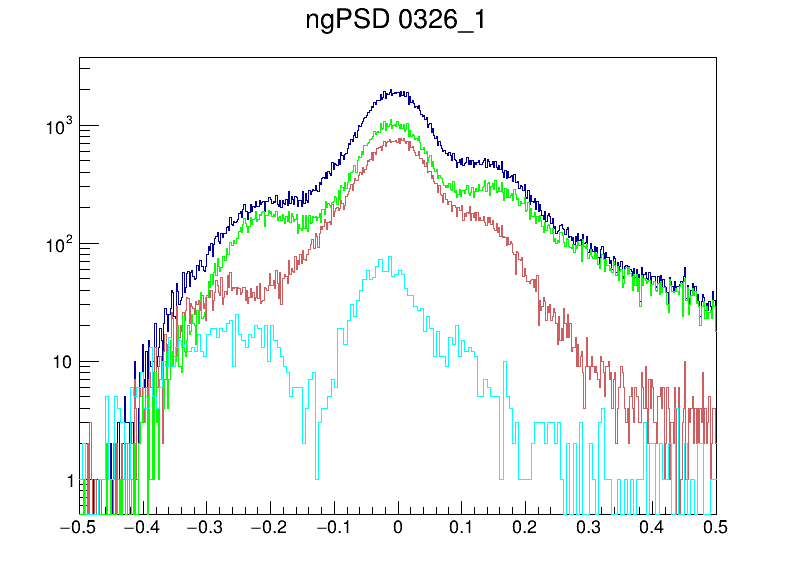

In [27]:
TH1D *CHh = new TH1D("CHh","CHh",200,a,b);
tree->Draw(Form("ngpsd[%d]>>CHh",ch)
          ,Form("all_ee[%d]>%f",ch,4.0));
CHh->SetLineColor(7);
hi->SetTitle(Form("ngPSD %04d_%d",RUN,ch));
hi->SetStats(0);
hi->Draw();
his->Draw("same");
hist->Draw("same");
//Amh->Draw("same");
CHh->Draw("same");
gPad->SetLogy();
c3->Draw();

In [28]:
//c3->SaveAs(Form("./../figure/ngPSD_bpbg_0%d_%d.pdf",RUN,ch));

In [29]:
cout << "all entries : " << hi->GetEntries() << endl; 
cout << "back ground : " << his->GetEntries() << endl;
cout << "BG rate     : " << his->GetEntries() / hi->GetEntries() ;

all entries : 175088
back ground : 61048
BG rate     : 0.34867

In [30]:
double beamtime=0.0;
double no_beamtime=0.0;

for(int i=0; i<4; i++){ beamtime = beamtime + st[i]*2; }
no_beamtime = (m[3]+st[3])-(m[0]-st[0]) - beamtime; 

double BGpTDC = his->GetEntries()/no_beamtime;
double beampTDC = hist->GetEntries()/beamtime - BGpTDC;
double beamrateRF = beampTDC/(BGpTDC+beampTDC);
double BGrateRF = BGpTDC/(BGpTDC+beampTDC);

//cout << "BG   par tdc : " << BGpTDC << endl;
//cout << "beam par tdc : " << beampTDC << endl;
cout << "beam rate in RF : " << beamrateRF << endl;
cout << "BG   rate in RF : " << BGrateRF << endl;

beam rate in RF : 0.825409
BG   rate in RF : 0.174591


In [31]:
//countしたいが途中
/*
int NeCountbt, gaCountbt, NeCountBG, gaCountBG;
double realNeutronCount;

NeCountbt = tree->GetEntries(Form("-0.120506<ngpsd[%d] && ngpsd[%d]<0.105487",ch,ch)); //値はch=2
cout << NeCountbt;
*/